In [1]:
import pandas as pd
import numpy as np

#Load the data and print the head

In [12]:
csv_data = pd.read_csv('data/Fire_Hydrants_(DWP).csv')
# print(csv_data.head())
# print(csv_data.X)
# print(csv_data.Y)
print(csv_data.X[0])
print(csv_data.Y[0])
print(csv_data.X[1])
print(len(csv_data.X))

-13167886.9375477
4027209.86454236
-13155553.8572792
60295


In [25]:
import geojson

with open('data/Fire_Hydrants_(DWP).geojson', 'r') as f:
    # print(f.read())
    geojson_data = geojson.load(f)

# print('Geodata type: ',type(geojson_data))
print(geojson_data['features'][0])
print(type(geojson_data['features'][1]))
# Obraining the coordinates of the first feature
print(geojson_data['features'][0]['geometry']['coordinates'])
# geojson_data['']


{"geometry": {"coordinates": [-118.289141, 33.988142], "type": "Point"}, "properties": {"HYDRTS_ID": 7726, "MAIN_SIZE": 6, "MAKE_CODE": "CLOW", "MAKE_DESCRIPTION": "Clow", "NLA_URL": "navigatela/reports/fire_hydrants_dwp.cfm?PK=7726", "OBJECTID": 1, "SIZE_CODE": "2 1/2 X 4D", "TOOLTIP": "Size: 2 1/2 X 4D\\nType: Clow\\nMain Size: 6"}, "type": "Feature"}
<class 'geojson.feature.Feature'>
[-118.289141, 33.988142]


In [26]:
import geojson

with open('data/Very_High_Fire_Hazard_Severity_Zones.geojson', 'r') as f:
    # print(f.read())
    geojson_data = geojson.load(f)

# print('Geodata type: ',type(geojson_data))
print(geojson_data['features'][0])


{"geometry": {"coordinates": [[[-118.313949, 33.741715], [-118.313945, 33.74193], [-118.314606, 33.741773], [-118.315263, 33.741687], [-118.315837, 33.741552], [-118.316465, 33.741585], [-118.316947, 33.741736], [-118.317345, 33.741766], [-118.318063, 33.741609], [-118.318864, 33.74155], [-118.319682, 33.741656], [-118.319428, 33.741064], [-118.319125, 33.740621], [-118.318711, 33.740664], [-118.318312, 33.740682], [-118.317932, 33.740674], [-118.317432, 33.740407], [-118.316981, 33.740161], [-118.316612, 33.740013], [-118.316072, 33.739909], [-118.315559, 33.739878], [-118.314987, 33.739917], [-118.314472, 33.739981], [-118.314129, 33.740023], [-118.313901, 33.739948], [-118.313763, 33.739756], [-118.313624, 33.739563], [-118.313225, 33.739485], [-118.312853, 33.739366], [-118.312695, 33.739258], [-118.312436, 33.739081], [-118.31216, 33.739182], [-118.311773, 33.739415], [-118.311396, 33.739716], [-118.310955, 33.740211], [-118.311723, 33.740502], [-118.312342, 33.740761], [-118.3127

## Reading the HIGH HAZARD LOCATION OF THE LA ZONE FOR FIRES AND PLOT THEM INTO A SURFACE

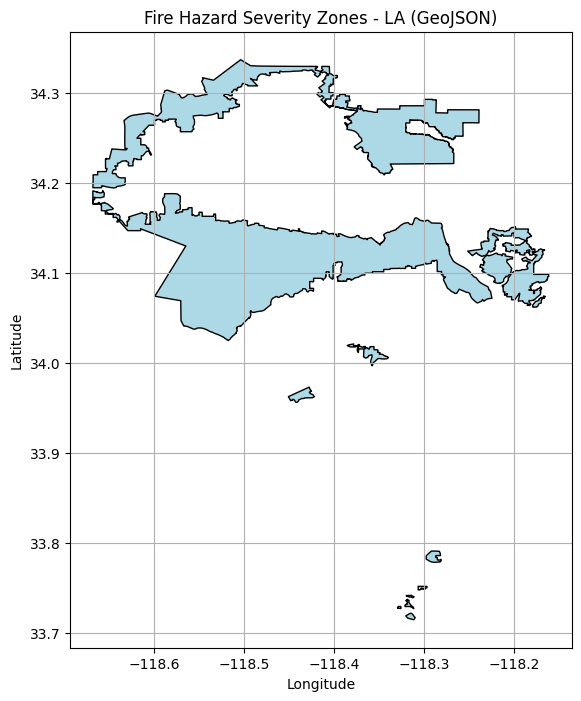

In [29]:
import json
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

# Load GeoJSON file
with open('data/Very_High_Fire_Hazard_Severity_Zones.geojson', 'r') as f:
    geojson_data = json.load(f)

# Initialize an empty list to store geometries
geometries = []

# Extract geometries from GeoJSON features
for feature in geojson_data['features']:
    geometry = feature['geometry']
    
    if geometry['type'] == "Point":
        geometries.append(Point(geometry['coordinates']))
    
    elif geometry['type'] == "LineString":
        geometries.append(LineString(geometry['coordinates']))
    
    elif geometry['type'] == "Polygon":
        geometries.append(Polygon(geometry['coordinates'][0]))  # First set of coordinates (outer boundary)
    
    elif geometry['type'] == "MultiPolygon":
        for polygon in geometry['coordinates']:
            geometries.append(Polygon(polygon[0]))

# Convert to GeoPandas DataFrame
gdf = gpd.GeoDataFrame(geometry=geometries)

# Plot using GeoPandas
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, edgecolor='black', facecolor='lightblue')

# Customize Plot
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Fire Hazard Severity Zones - LA (GeoJSON)")
plt.grid(True)
plt.show()


In [28]:
coord_list

[[-118.41750315563544, 34.11250124027475],
 [-118.41750315052887, 34.11250173703941],
 [-118.41747341784529, 34.11250183975495],
 [-118.41686887786842, 34.11250907891781],
 [-118.41667892074544, 34.11251007751275],
 [-118.41615200916077, 34.11251567146383],
 [-118.41605290423703, 34.11251704315544],
 [-118.41605276407768, 34.112488877813256],
 [-118.41605348295606, 34.11248675221828],
 [-118.41606075404094, 34.11228078273614],
 [-118.41605998219376, 34.11227966929045],
 [-118.41605945116656, 34.11227750652793],
 [-118.41598685154139, 34.1121701156194],
 [-118.41598675561409, 34.1121700059621],
 [-118.41598178138757, 34.112166244742085],
 [-118.41597846067967, 34.11216282131589],
 [-118.41597348474505, 34.11215871661579],
 [-118.41596519323069, 34.11215221892817],
 [-118.41594695327062, 34.112138198797446],
 [-118.41594363598283, 34.11213546232982],
 [-118.41594197050381, 34.112132720176916],
 [-118.41593533592923, 34.112127247241354],
 [-118.41593367045066, 34.11212450508827],
 [-118.4